In [96]:
#import datasets
from sklearn import datasets
#import preprocessing package
from sklearn import preprocessing

#import library for numerical computing
import numpy as np
import scipy
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
#See what small datasets skleran contains
datasets.load_*?

#See what kind of dataset can we make
datasets.make_*?

In [9]:
#store boston dataset into boston variable
boston = datasets.load_boston()

#see description of boston dataset
#other attributes:'data', 'target', 'feature_names' 
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [4]:
#regression data
reg_data = datasets.make_regression(1000, 10, 5, 2, 1.0)
#classification data
classification_set = datasets.make_classification(weights=[0.1])
#cluster data
blobs_set = datasets.make_blobs()

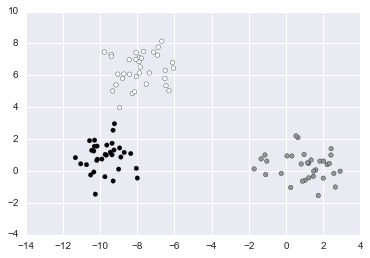

In [5]:
plt.scatter(blobs_set[0][:,0], blobs_set[0][:,1], c=blobs_set[1])

# Preprocessing ------ <font color='red'>Scale</color> 

In [28]:
x = np.random.randint(low=-1, high=10, size=20).reshape(5,4)

In [30]:
x

array([[ 9,  6,  0,  1],
       [ 4, -1,  7,  1],
       [ 1,  7,  6, -1],
       [ 8,  9,  4,  3],
       [ 3,  1,  9,  7]])

In [37]:
x_pre = x[:,:3]
x_pre

array([[ 9,  6,  0],
       [ 4, -1,  7],
       [ 1,  7,  6],
       [ 8,  9,  4],
       [ 3,  1,  9]])

### Before preprocessing

In [38]:
#get mean of the first 3 features
x_pre.mean(axis=0)

array([ 5. ,  4.4,  5.2])

In [39]:
#get std of the first 3 features
x_pre.std(axis=0)

array([ 3.03315018,  3.77359245,  3.05941171])

#### 1. After normal function scale preprocessing

In [40]:
x_2 = preprocessing.scale(x_pre)
x_2

C:\Users\cyi\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int32 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


array([[ 1.31876095,  0.42399915, -1.69967317],
       [-0.32969024, -1.43099714,  0.58834841],
       [-1.31876095,  0.68899862,  0.26148818],
       [ 0.98907071,  1.21899756, -0.39223227],
       [-0.65938047, -0.9009982 ,  1.24206886]])

In [42]:
#get mean of the first 3 features
x_2.mean(axis=0)

array([ -2.22044605e-17,  -1.33226763e-16,  -4.44089210e-17])

In [44]:
#get std of the first 3 features
x_2.std(axis=0)

array([ 1.,  1.,  1.])

#### 1. After scaler preprocessing --------> pipeline using

In [49]:
#normal preprocessor
normal_scaler = preprocessing.StandardScaler()
normal_scaler.fit_transform(x_pre)

C:\Users\cyi\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\cyi\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 1.31876095,  0.42399915, -1.69967317],
       [-0.32969024, -1.43099714,  0.58834841],
       [-1.31876095,  0.68899862,  0.26148818],
       [ 0.98907071,  1.21899756, -0.39223227],
       [-0.65938047, -0.9009982 ,  1.24206886]])

In [51]:
#min-max preprocessor
minmax_scaler = preprocessing.MinMaxScaler()
minmax_scaler.fit_transform(x_pre)

C:\Users\cyi\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 1.        ,  0.7       ,  0.        ],
       [ 0.375     ,  0.        ,  0.77777778],
       [ 0.        ,  0.8       ,  0.66666667],
       [ 0.875     ,  1.        ,  0.44444444],
       [ 0.25      ,  0.2       ,  1.        ]])

In [61]:
#max-abs preprocessor
max_scaler = preprocessing.MaxAbsScaler()
max_scaler.fit_transform(x_pre)

array([[ 1.        ,  0.6       ,  0.        ],
       [ 0.44444444, -0.1       ,  0.77777778],
       [ 0.11111111,  0.7       ,  0.66666667],
       [ 0.88888889,  0.9       ,  0.44444444],
       [ 0.33333333, -1.        ,  1.        ]])

In [68]:
#euclidean distance
preprocessing.normalize(x_pre)

C:\Users\cyi\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int32 was converted to float64 by the normalize function.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.83205029,  0.5547002 ,  0.        ],
       [ 0.49236596, -0.12309149,  0.86164044],
       [ 0.10783277,  0.75482941,  0.64699664],
       [ 0.63048832,  0.70929937,  0.31524416],
       [ 0.21764288, -0.72547625,  0.65292863]])

# Preprocessing ------ <font color='red'>Imputation</color>

In [70]:
matrix = scipy.sparse.eye(10)

In [72]:
print(matrix)

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0
  (4, 4)	1.0
  (5, 5)	1.0
  (6, 6)	1.0
  (7, 7)	1.0
  (8, 8)	1.0
  (9, 9)	1.0


# Preprocessing ------ <font color='red'>Convert continous to binary</color>

In [73]:
boston = datasets.load_boston()

In [89]:
preprocessing.binarize(boston.target.reshape(1,-1), threshold=boston.target.mean())[0][:5]

array([ 1.,  0.,  1.,  1.,  1.])

In [92]:
(boston.target > boston.target.mean()).astype(int)[:5]

array([1, 0, 1, 1, 1])

# Preprocessing ------ <font color='red'>Convert categorical variables</color>

In [94]:
iris = datasets.load_iris()
x = iris.data
y = iris.target

In [129]:
d_pd = pd.DataFrame(d, columns=iris.feature_names)

In [134]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

In [130]:
d_pd.head(3)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0


In [127]:
#vertical stack target and feactures
d = np.column_stack((x,y))

In [148]:
text_encoder = preprocessing.OneHotEncoder()
text_encoder.fit_transform(d[:,-1:]).toarray()[:5]

array([[ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.]])

In [146]:
d[:,-1:]

array([[ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
      

In [147]:
d[:,-1]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.])